In [4]:
import numpy as np

In [5]:
import galapy.StarFormationHistory as SFH

In [6]:
import galapy.internal.CPySFH as csfh

In [7]:
tau_quench = 8.e+8

Let's build the sfh-objects from different models:

- **In-Situ** (default)

    Parameter list:
    1. $\Psi_\text{max}$ normalization of the SFR (in $[M_\odot \text{yr}^{-1}]$)
    2. $\tau_\ast$ characteristic time (in $[\text{yr}]$)

In [8]:
sfh_insitu = csfh.CSFH( tau_quench, model = 'insitu' )
sfh_insitu.set_params( np.asarray( [ 100, 3.e+8 ], dtype = float ) )

In [9]:
sfh_insitu = SFH.SFH( tau_quench, model = 'insitu' )
sfh_insitu.set_parameters( [ 100, 3.e+8 ] )

- **Constant**

    Parameter list:
    1. $\Psi_\text{const}$ constant value of the SFR (in $[M_\odot \text{yr}^{-1}]$)

In [10]:
sfh_const = csfh.CSFH( tau_quench, model = 'constant' )
sfh_const.set_params( np.asarray( [ 1. ], dtype = float ) )

- **Delayed Exponential**

    Parameter list:
    1. $\Psi_\text{norm}$ normalization of the SFR (in $[M_\odot \text{yr}^{-1}]$)
    2. $\kappa$ shape parameter (adimensional)
    3. $\tau_\ast$ characteristic time (in $[\text{yr}]$)

In [11]:
sfh_dexp = csfh.CSFH( tau_quench, model = 'delayedexp' )
sfh_dexp.set_params( np.asarray( [ 1, 0.2, 1.e+8 ], dtype = float ) )

- **Log-Normal**

    Parameter list:
    1. $\Psi_\text{norm}$ normalization of the SFR (in $[M_\odot \text{yr}^{-1}]$)
    2. $\sigma_\ast$ time span of evolution (adimensional)
    3. $\tau_\ast$ characteristic time (in $[\text{yr}]$)

In [12]:
sfh_lnorm = csfh.CSFH( tau_quench, model = 'lognormal' )
sfh_lnorm.set_params( np.asarray( [ 100, 2., 3.e+8 ], dtype = float ) )

Each of these objects can model the star formation history at some given galactic age in two different ways:

- by calling the object itself at some moment in time:
```python
time = 1.e+8      # time is always expressed in [yr]
sfh_model( time ) # will return a scalar
```
- by calling the `eval` function which accepts both a single time value or an array of times (i.e. ages):
```python
time = np.logspace( 6, 9, 100 ) # an array of 100 time values from 10^6 to 10^9 years
sfh_model.eval( time )          # will return an array
```

The latter is the preferred way when using arrays as input (i.e. don't use the first + list comprehension, it's less computationally efficient).

We therefore define an array of times and compute the sfh ($\psi$) at each of these times for the different models:

In [13]:
tau = np.logspace( 6, 10, 200 )
psi_insitu = np.asarray( sfh_insitu( tau ) )
psi_const  = np.asarray( sfh_const( tau ) )
psi_dexp   = np.asarray( sfh_dexp( tau ) )
psi_lnorm  = np.asarray( sfh_lnorm( tau ) )

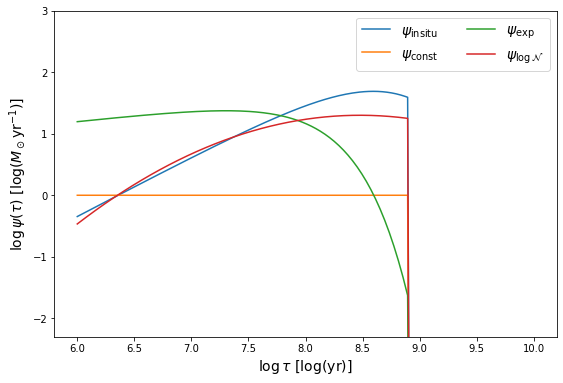

In [14]:
import matplotlib.pyplot as plt
plt.figure( figsize = ( 9,6 ) )
plt.ylim( [ -2.3, 3. ] )
plt.xlabel( '$\\log\\tau$ $[\\log( \\mathrm{yr} )]$', fontsize = 14 )
plt.ylabel( '$\\log\\psi(\\tau)$ $[\\log (M_\\odot \\mathrm{yr}^{-1})]$', fontsize = 14 )
# summing an arbitrary small number (1.e-7) to avoid log10(0.) values:
plt.plot( np.log10( tau ), np.log10( psi_insitu + 1.e-7 ), label = '$\\psi_\\mathrm{in situ}$' )
plt.plot( np.log10( tau ), np.log10( psi_const + 1.e-7 ),  label = '$\\psi_\\mathrm{const}$' )
plt.plot( np.log10( tau ), np.log10( psi_dexp + 1.e-7 ),   label = '$\\psi_\\mathrm{exp}$' )
plt.plot( np.log10( tau ), np.log10( psi_lnorm + 1.e-7 ),  label = '$\\psi_{\\log\\mathcal{N}}$' )
plt.legend( fontsize = 14, ncol = 2 )

As a result of star formation, the total mass of stars hosted in a given galaxy varies while the galaxy ages. We can compute this evolving quantity with the dedicated function `Mstar()`

In [15]:
Mstar_insitu = np.asarray( [ sfh_insitu.Mstar( tt ) for tt in tau ] )
Mstar_const  = np.asarray( [ sfh_const.Mstar( tt ) for tt in tau ] )
Mstar_dexp   = np.asarray( [ sfh_dexp.Mstar( tt ) for tt in tau ] )
Mstar_lnorm  = np.asarray( [ sfh_lnorm.Mstar( tt ) for tt in tau ] )

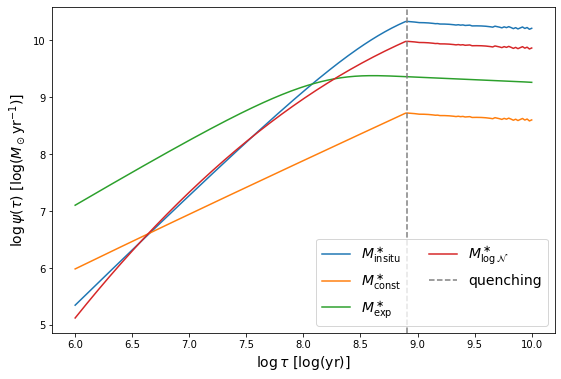

In [16]:
import matplotlib.pyplot as plt
plt.figure( figsize = ( 9,6 ) )
plt.xlabel( '$\\log\\tau$ $[\\log( \\mathrm{yr} )]$', fontsize = 14 )
plt.ylabel( '$\\log\\psi(\\tau)$ $[\\log (M_\\odot \\mathrm{yr}^{-1})]$', fontsize = 14 )
plt.plot( np.log10( tau ), np.log10( Mstar_insitu + 1.e-7 ), label = '$M_\\mathrm{in situ}^\\ast$' )
plt.plot( np.log10( tau ), np.log10( Mstar_const + 1.e-7 ),  label = '$M_\\mathrm{const}^\\ast$' )
plt.plot( np.log10( tau ), np.log10( Mstar_dexp + 1.e-7 ),   label = '$M_\\mathrm{exp}^\\ast$' )
plt.plot( np.log10( tau ), np.log10( Mstar_lnorm + 1.e-7 ),  label = '$M_{\\log\\mathcal{N}}^\\ast$' )
plt.axvline( np.log10( tau_quench ), color = 'gray', ls = '--', label = 'quenching')
plt.legend( fontsize = 14, ncol = 2 )

As shown in the plot above, after quenching, the total stellar mass stops growing (as matter is no longer converted from medium into stars). 
The plots show a mildly decreasing behaviour due to the expected mass loss of aging stellar populations.

**Note that** the numerical noise present in the latest stages of the in-situ, contant and log-normal evolution is supposedly due to the numerical noise introduced by the integration scheme used in the implementation of this function. 

## Derived quantities:

**\[For the In-Situ model only\]** we can also compute the derived ISM quantities at varying time (age):
- Dust mass
- Gass mass and metallicity
- Stellar metallicity

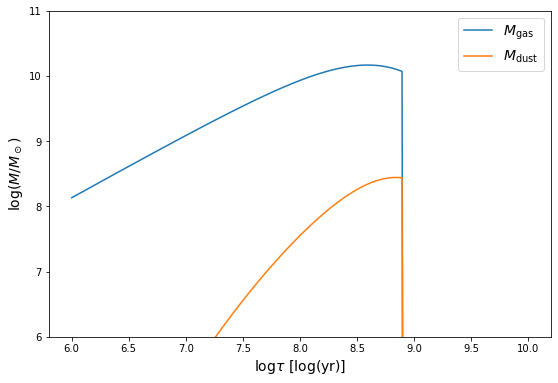

In [12]:
plt.figure( figsize = ( 9,6 ) )
plt.ylim( [ 6., 11. ] )
# plt.grid( True )
plt.xlabel( '$\\log\\tau$ $[\\log( \\mathrm{yr} )]$', fontsize = 14 )
plt.ylabel( '$\\log ( M / M_\\odot)$', fontsize = 14 )
plt.plot( np.log10( tau ), np.log10( sfh_insitu.Mgas( tau ) + 1.e-7 ), label = '$M_\\mathrm{gas}$' )
plt.plot( np.log10( tau ), np.log10( sfh_insitu.Mdust( tau ) + 1.e-7 ), label = '$M_\\mathrm{dust}$' )
plt.legend( fontsize = 14 )

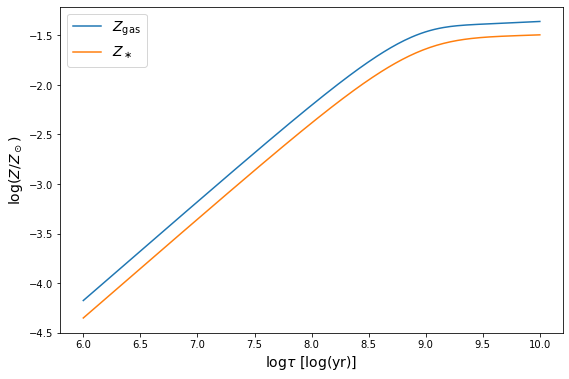

In [13]:
plt.figure( figsize = ( 9,6 ) )
plt.xlabel( '$\\log\\tau$ $[\\log( \\mathrm{yr} )]$', fontsize = 14 )
plt.ylabel( '$\\log ( Z / Z_\\odot)$', fontsize = 14 )
plt.plot( np.log10( tau ), np.log10( sfh_insitu.Zgas( tau ) ), label = '$Z_\\mathrm{gas}$' )
plt.plot( np.log10( tau ), np.log10( sfh_insitu.Zstar( tau ) ), label = '$Z_\\ast$' )
plt.legend( fontsize = 14 )